In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import plot_tree
import category_encoders as ce
from sklearn.metrics import accuracy_score

In [172]:
df = pd.read_csv('car_evaluation.csv')
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [173]:
df.shape

(1727, 7)

In [174]:
df.head

<bound method NDFrame.head of       vhigh vhigh.1      2   2.1  small   low  unacc
0     vhigh   vhigh      2     2  small   med  unacc
1     vhigh   vhigh      2     2  small  high  unacc
2     vhigh   vhigh      2     2    med   low  unacc
3     vhigh   vhigh      2     2    med   med  unacc
4     vhigh   vhigh      2     2    med  high  unacc
...     ...     ...    ...   ...    ...   ...    ...
1722    low     low  5more  more    med   med   good
1723    low     low  5more  more    med  high  vgood
1724    low     low  5more  more    big   low  unacc
1725    low     low  5more  more    big   med   good
1726    low     low  5more  more    big  high  vgood

[1727 rows x 7 columns]>

In [175]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [176]:
df['class'].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [177]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

There are no missing value in the dataset, so it's clean

In [178]:
X = df.drop(['class'], axis=1)
y = df['class']

In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state=40)


Encoding categorical variables 

In [180]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1126,med,med,3,more,small,high
638,high,high,5more,more,small,low
1575,low,med,4,4,small,med
1295,low,vhigh,2,2,small,low
660,high,med,2,4,med,med


In [181]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [182]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1126,1,1,1,1,1,1
638,2,2,2,1,1,2
1575,3,1,3,2,1,3
1295,3,3,4,3,1,2
660,2,1,4,2,2,3


In [183]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

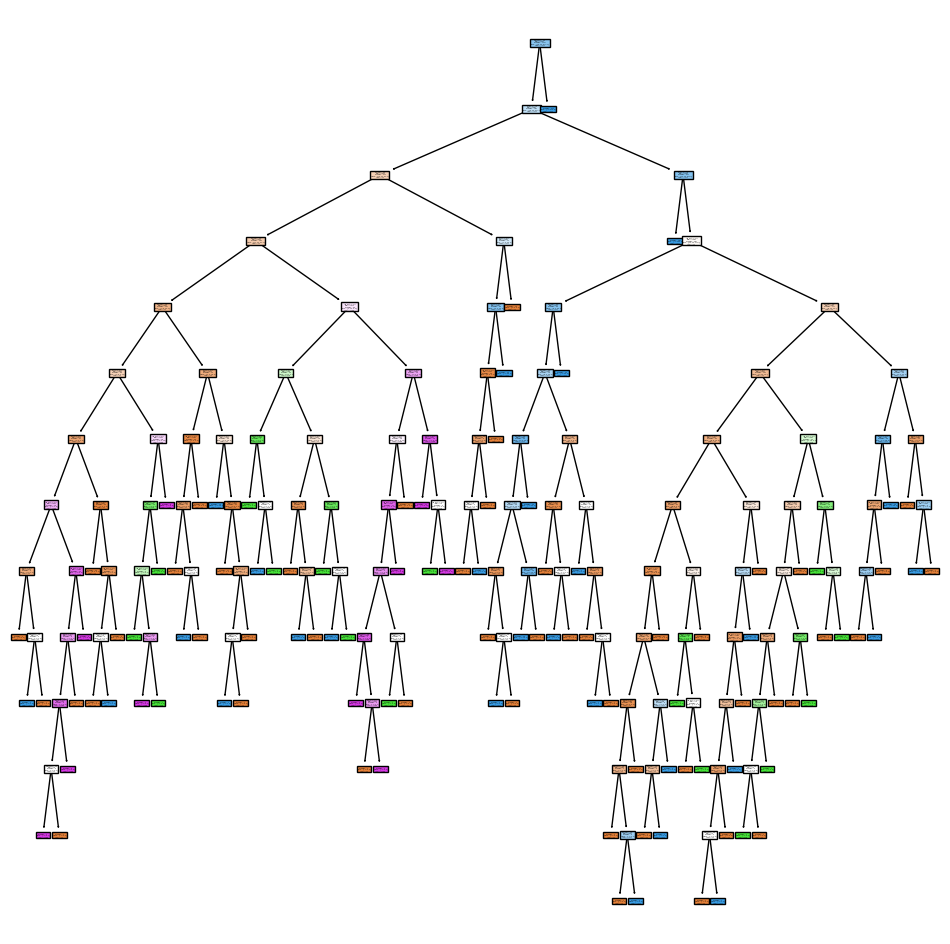

In [184]:

fig, ax = plt.subplots(figsize=(12, 12))
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=clf.classes_, ax=ax)
plt.show()


### Task 02


In [185]:
from sklearn.ensemble import GradientBoostingClassifier

In [186]:
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier()

Calculating  the significance of variables using the feature importances attribute

In [187]:
feature_importances = gb_classifier.feature_importances_

In [188]:
constructed_trees = gb_classifier.estimators_

Display a list of constructed trees

In [189]:
constructed_trees = gb_classifier.estimators_
for idx, tree in enumerate(constructed_trees):
    print(f"Tree {idx}:\n{tree[0]}")

Tree 0:
DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x236C086E840)
Tree 1:
DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x236C086E840)
Tree 2:
DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x236C086E840)
Tree 3:
DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x236C086E840)
Tree 4:
DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x236C086E840)
Tree 5:
DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x236C086E840)
Tree 6:
DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x236C086E840)

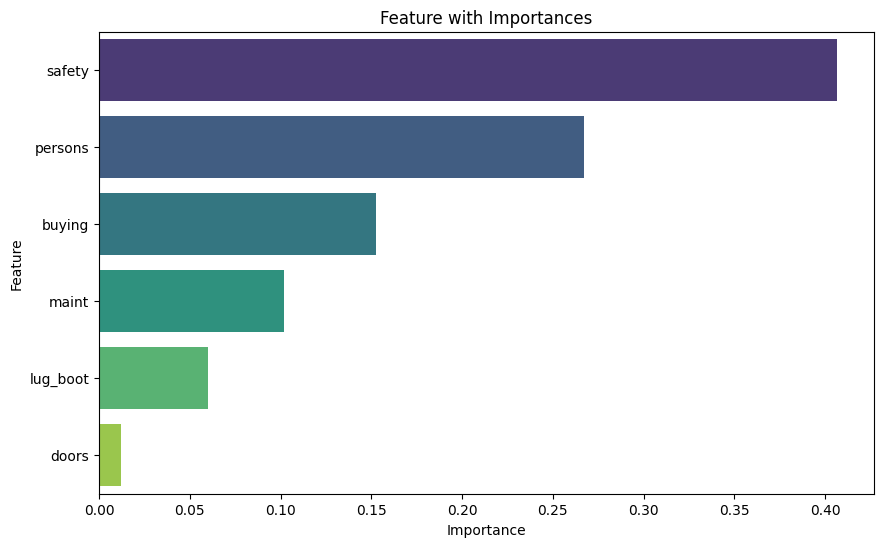

In [190]:
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature with Importances')
plt.show()

### Task 03

In [191]:
max_depths = range(1, 50)

In [192]:
mean_scores_train = []
mean_scores_test = []

for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth)
    scores_train = cross_val_score(clf, X_train, y_train, cv=5)
    scores_test = cross_val_score(clf, X_test, y_test, cv=5)

    mean_scores_train.append(scores_train.mean())
    mean_scores_test.append(scores_test.mean())


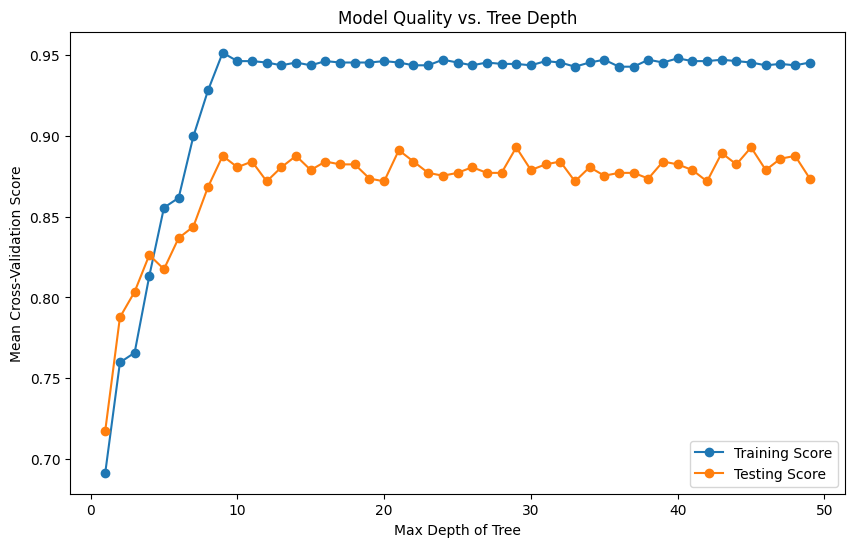

In [193]:
plt.figure(figsize=(10, 6))
plt.plot(max_depths, mean_scores_train, label='Training Score', marker='o')
plt.plot(max_depths, mean_scores_test, label='Testing Score', marker='o')
plt.xlabel('Max Depth of Tree')
plt.ylabel('Mean Cross-Validation Score')
plt.title('Model Quality vs. Tree Depth')
plt.legend()
plt.show()


### Task 04

In [194]:
max_depths = [2, 3, 4, 5] 
n_estimators = range(10, 101, 10) 


In [195]:
results = []

In [196]:
for depth in max_depths:
    for n_tree in n_estimators:
        gb_classifier = GradientBoostingClassifier(max_depth=depth, n_estimators=n_tree)
        scores = cross_val_score(gb_classifier, X_train, y_train, cv=5)
        mean_score = scores.mean()
        results.append((depth, n_tree, mean_score))


to get rid of duplicates by aggregate or average the values for those duplicates

In [204]:
results_df = results_df.groupby(['Max Depth', 'Number of Trees'], as_index=False).agg({'Mean Score': 'mean'})


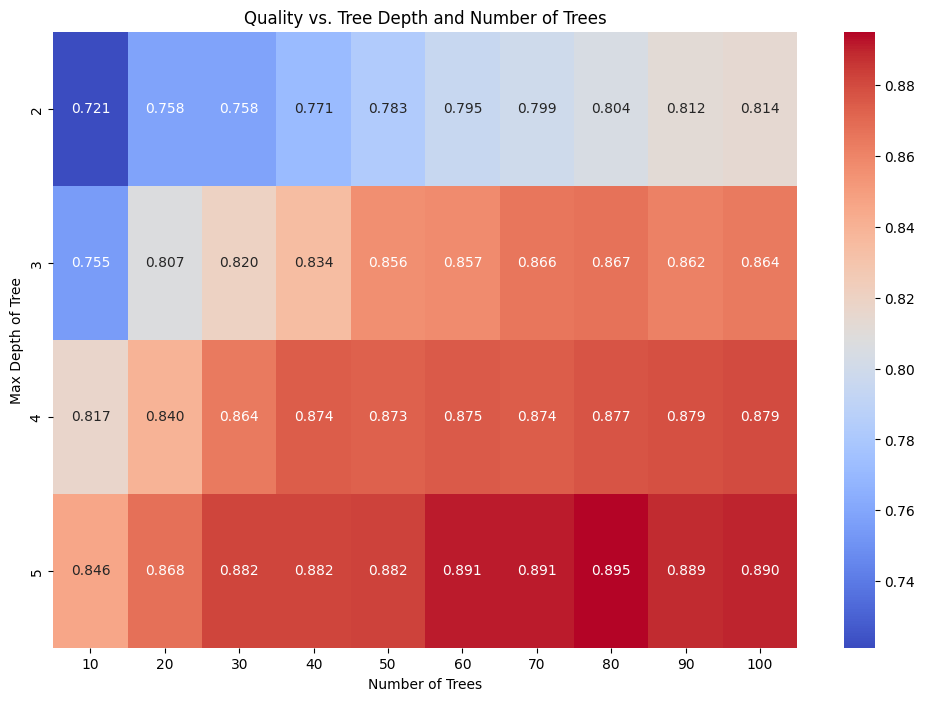

In [205]:
pivot_table = results_df.pivot(index='Max Depth', columns='Number of Trees', values='Mean Score')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='.3f', cmap='coolwarm')
plt.title('Quality vs. Tree Depth and Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Max Depth of Tree')
plt.show()


### Task 05 

In [199]:
from sklearn.ensemble import RandomForestClassifier

In [206]:
for depth in max_depths:
    for n_tree in n_estimators:
        rf_classifier = RandomForestClassifier(n_estimators=n_tree, max_depth=depth)
        scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)
        mean_score = scores.mean()
        results.append((depth, n_tree, mean_score))


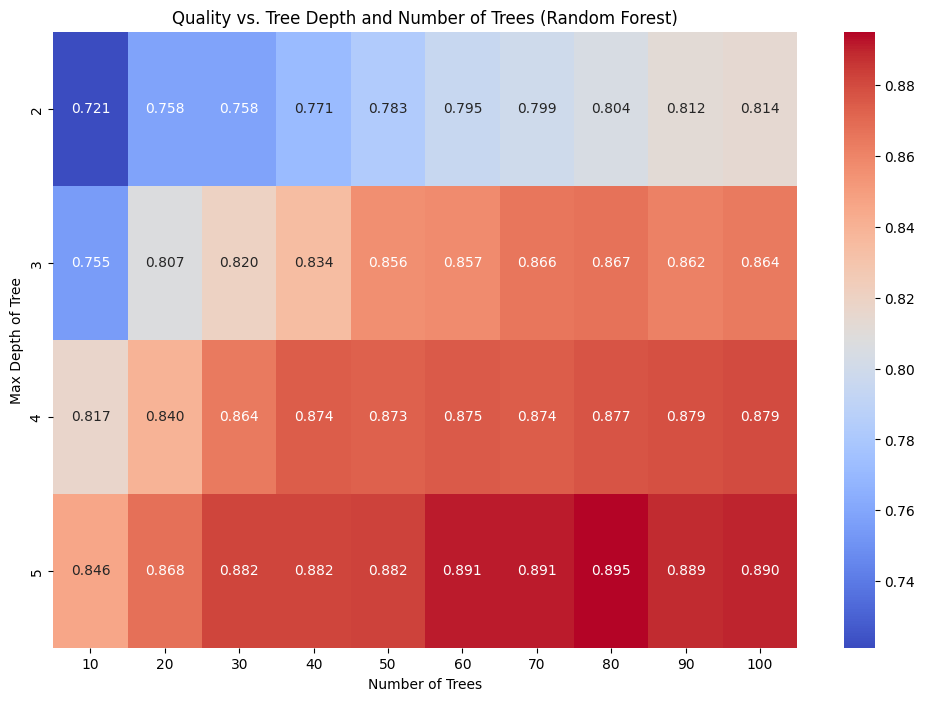

In [213]:
pivot_table = results_df.pivot(index='Max Depth', columns='Number of Trees', values='Mean Score')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='.3f', cmap='coolwarm')
plt.title('Quality vs. Tree Depth and Number of Trees (Random Forest)')
plt.xlabel('Number of Trees')
plt.ylabel('Max Depth of Tree')
plt.show()